In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load a pre-trained VGG model (example using TensorFlow/Keras)
vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

/Users/mikhail.barsukou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load and preprocess the input image
input_image = cv2.imread('person_image.png')
input_image = cv2.resize(input_image, (224, 224))  # Resize to match VGG input size
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
input_image = tf.keras.applications.vgg16.preprocess_input(input_image)

# Perform inference and obtain feature maps from an intermediate layer (e.g., block3_conv3)
layer_name = 'block3_conv3'
feature_model = tf.keras.models.Model(inputs=vgg_model.input, outputs=vgg_model.get_layer(layer_name).output)
feature_maps = feature_model.predict(np.expand_dims(input_image, axis=0))

# Post-process feature maps to create a segmentation mask
# Example: Thresholding to create a binary mask
threshold = 0.5
segmentation_mask = (feature_maps > threshold).astype(np.float32)

# Overlay the segmentation mask on the input image
overlay_image = cv2.addWeighted(input_image, 0.7, cv2.cvtColor(segmentation_mask[0], cv2.COLOR_GRAY2BGR), 0.3, 0, dtype=cv2.CV_32F)

# Display the overlay image using matplotlib
plt.imshow(overlay_image)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 81ms/step


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 256


(1700, 1190, 3)
1/1 [==============================] - 0s 144ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 56, 56, 256)
(1, 56, 56)


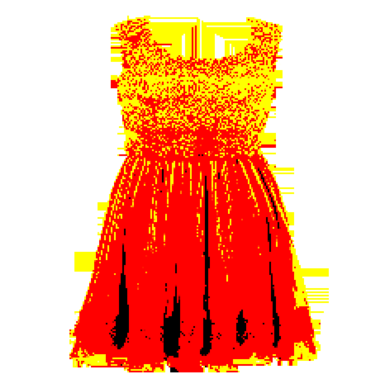

In [9]:
# Load a pre-trained VGG model (example using TensorFlow/Keras)
vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# Load and preprocess the input image
input_image = cv2.imread('dress_image.png')
print(input_image.shape)
input_image = tf.image.resize(input_image, [224, 224], method=tf.image.ResizeMethod.LANCZOS5).numpy()  # Resize to match VGG input size
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
input_image = tf.keras.applications.vgg16.preprocess_input(input_image)

# Perform inference and obtain feature maps from an intermediate layer (e.g., block3_conv3)
layer_name = 'block3_conv3'
feature_model = tf.keras.models.Model(inputs=vgg_model.input, outputs=vgg_model.get_layer(layer_name).output)
feature_maps = feature_model.predict(np.expand_dims(input_image, axis=0))
print(feature_maps.shape)
# Reduce feature maps to a single-channel mask (e.g., by summing across channels)
segmentation_mask = np.sum(feature_maps, axis=-1)
print(segmentation_mask.shape)
segmentation_mask = (segmentation_mask > threshold).astype(np.float32)  # Apply threshold if necessary
# Resize the grayscale mask to match the dimensions of the input image
segmentation_mask_resized = cv2.resize(segmentation_mask[0], (input_image.shape[1], input_image.shape[0]))

# Convert the single-channel mask to a 3-channel mask (grayscale)
segmentation_mask_grayscale = cv2.cvtColor(segmentation_mask_resized, cv2.COLOR_GRAY2BGR)

# Overlay the grayscale mask on the input image
overlay_image = cv2.addWeighted(input_image, 0.7, segmentation_mask_grayscale, 0.3, 0)

# Display the overlay image using matplotlib
plt.imshow(overlay_image)
plt.axis('off')
plt.show()